In [5]:
from torch.functional import F
from copy import copy
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

# Bias-Variance Tradeoff
+ The bias error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

+ The variance is an error from sensitivity to small fluctuations in the training set. High variance may result from an algorithm modeling the random noise in the training data (overfitting).

![BS_tradeoff](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Bias_and_variance_contributing_to_total_error.svg/2560px-Bias_and_variance_contributing_to_total_error.svg.png)


## Four difference scenarios
|Bias low, Var low|Bias high, Var low|Bias low, Var high|Bias high, Var high|
|:-:|:-:|:-:|:-:|
|![blvl](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/En_low_bias_low_variance.png/240px-En_low_bias_low_variance.png)|![bgvl](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Truen_bad_prec_ok.png/240px-Truen_bad_prec_ok.png)|![blvh](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Truen_ok_prec_bad.png/240px-Truen_ok_prec_bad.png)|![bhvh](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Truen_bad_prec_bad.png/240px-Truen_bad_prec_bad.png)|
## Derivation
The derivation of the bias-variance decomposition for squared error

$\begin{align}
MSE &= \mathbb{E}[(y - \hat{y})^2] \\
 &= \mathbb{E}[y^2 -2y\hat{y} + \hat{y}^2] \\
 & = \mathbb{E}[y^2] - 2\mathbb{E}[y\hat{y}] + \mathbb{\hat{y}^2}
\end{align}$

torch.float32

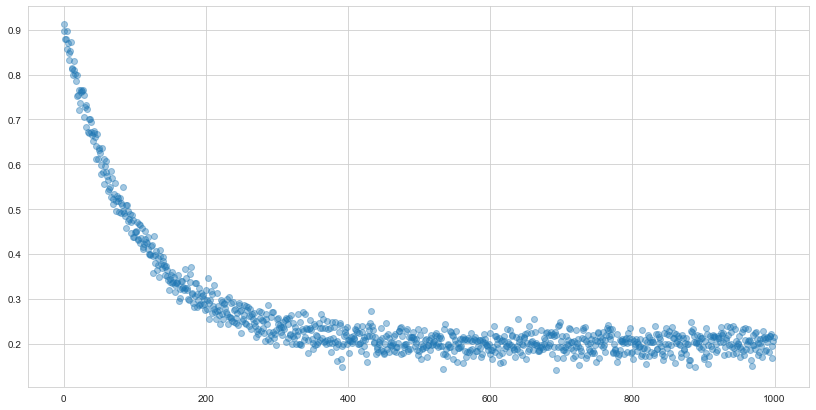

In [171]:
sns.set_style("whitegrid")
n = 1000
noise = torch.Tensor(np.random.normal(0, 0.02, size=n))
x = torch.arange(n)
x = x.type(torch.FloatTensor)
a, k, b = 0.7, .01, 0.2
y = a * np.exp(-k * x) + b + noise
plt.figure(figsize=(14, 7))
plt.scatter(x, y, alpha=0.4)
x = x.reshape((1000, -1))
x.dtype


# Vanilla Neural Network

In [176]:
import torch.optim as optim


class Model(nn.Module):
    """Custom Pytorch model for gradient optimization.
    """
    def __init__(self):
        
        super().__init__()
        # initialize weights with random numbers
        weights = torch.distributions.Uniform(0, 0.1).sample((3,))
        # make weights torch parameters
        self.weights = nn.Parameter(weights)        
        
    def forward(self, X):
        """Implement function to be optimised. In this case, an exponential decay
        function (a + exp(-k * X) + b),
        """
        a, k, b = self.weights
        return a * torch.exp(-k * X) + b

class ModelNN(nn.Module):
    '''
    两个必要函数：
    
    `__init__()`: 初始化函数
    
    `forward()`
    '''
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 10) # hidden layer 1
        self.linear2 = nn.Linear(10, 10) # hidden layer 2
        self.linear3 = nn.Linear(10, 10) # hidden layer 3
        self.linear4 = nn.Linear(10, 1) # output layer
    
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x
    
def training_loop(model, optimizer, x, y,  n=1000):
    "Training loop for torch model."
    losses = []
    for i in range(n):
        preds = model(x)
        loss_fn = torch.nn.MSELoss(reduction="sum") # define loss function
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())
        if i % 10000 == 9999:
            print("Iteration {}: {} ;".format(i + 1, loss.item()))
    return losses


Iteration 10000: 0.4289233684539795 ;
Iteration 20000: 0.408708393573761 ;
Iteration 30000: 0.447384774684906 ;
Iteration 40000: 0.40819665789604187 ;
Iteration 50000: 0.4094896912574768 ;


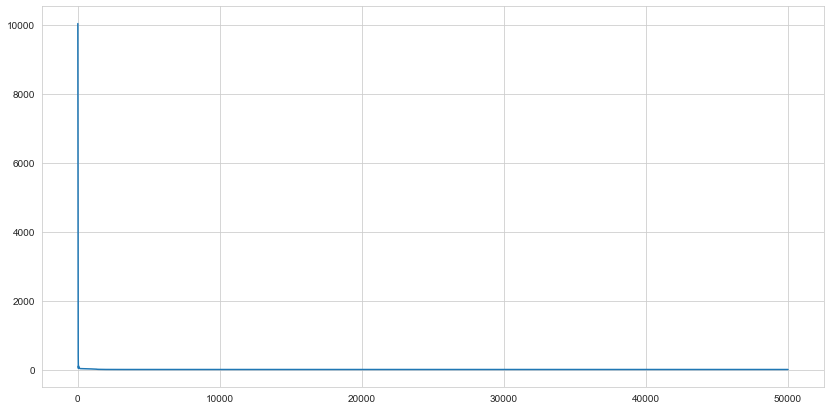

In [177]:
x = x.reshape([n, -1]) # training input
y = y.reshape([n, -1]) # training label
# define hyperparameters
lr = 1e-4
batch_size = 50
iters = 50000
# instantiate model
m = ModelNN()

# Instantiate optimizer
opt = torch.optim.Adam(m.parameters(), lr=lr) # define optimizer, 
losses = training_loop(m, opt, x, y, n=iters)
plt.figure(figsize=(14, 7))

plt.plot(losses)
# print(m.weights)

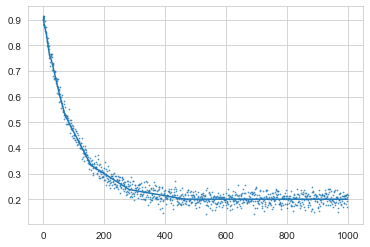

In [178]:
pred = m(x)
plt.plot(x.detach().numpy(), pred.detach().numpy())
plt.scatter(x.detach().numpy(), y, alpha=0.7, s=0.6)

# Regularization

# MODEL Complexity
## Neuron Dropout



# Batch Normalization